<Axes: xlabel='DHodnoceni', ylabel='PCenaUbytovani'>

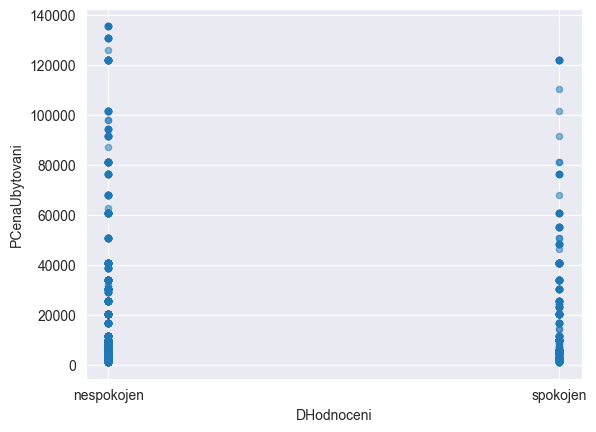

In [3]:
import pandas as pd

df = pd.read_excel('C:/Users/Lakip/Downloads/merged1.xlsx')
df["DHodnoceni"] = df["DHodnoceni"].replace("průměr", "nespokojen")
df.plot(kind = 'scatter', x = 'DHodnoceni', y = 'PCenaUbytovani', alpha=0.5)

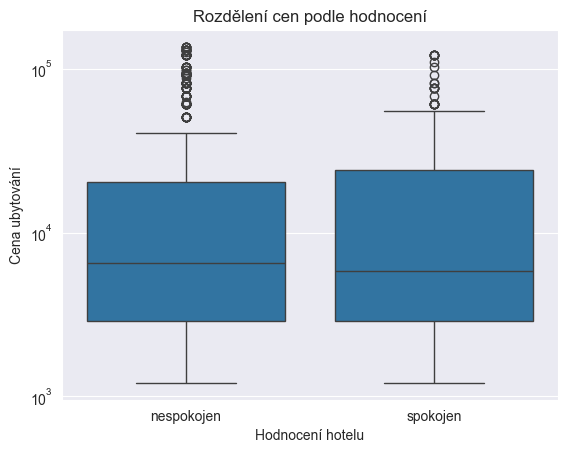

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_excel('C:/Users/Lakip/Downloads/merged1.xlsx')
df["DHodnoceni"] = df["DHodnoceni"].replace("průměr", "nespokojen")

sns.boxplot(x="DHodnoceni", y="PCenaUbytovani", data=df)
plt.yscale("log")
plt.ylabel("Cena ubytování")
plt.xlabel("Hodnocení hotelu")
plt.title("Rozdělení cen podle hodnocení")
plt.show()

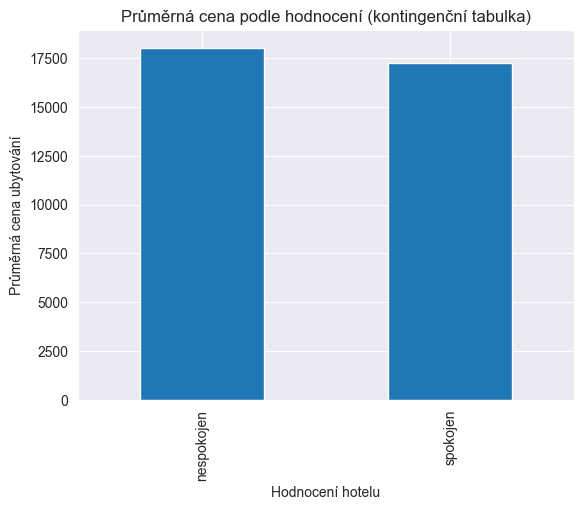

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_excel('C:/Users/Lakip/Downloads/merged1.xlsx')
df["DHodnoceni"] = df["DHodnoceni"].replace("průměr", "nespokojen")
pivot = pd.pivot_table(
    df,
    values='PCenaUbytovani',
    index='DHodnoceni',
    aggfunc='mean'
)
pivot.plot(kind='bar', legend=False)
plt.ylabel("Průměrná cena ubytování")
plt.xlabel("Hodnocení hotelu")
plt.title("Průměrná cena podle hodnocení (kontingenční tabulka)")
plt.show()

In [4]:

import pandas as pd

df = pd.read_excel('C:/Users/Lakip/Downloads/merged1.xlsx')
df["DHodnoceni"] = df["DHodnoceni"].replace("průměr", "nespokojen")

# Сортировка и деление на трети
df_sorted = df.sort_values(by="PCenaCelkem", ascending=False).reset_index(drop=True)
df_sorted["NTILE3"] = pd.qcut(df_sorted.index, q=3, labels=["Expensive", "Medium", "Cheap"])
df_sorted["IsExpensive"] = df_sorted["NTILE3"] == "Expensive"

# Таблица сопряжённости
table = pd.crosstab(df_sorted["IsExpensive"], df_sorted["DHodnoceni"])
print(table)

DHodnoceni   nespokojen  spokojen
IsExpensive                      
False              1015       318
True                505       162
